In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [98]:
data= pd.read_csv("C:\\Users\\HP\\Downloads\\AirPassengers.csv")

In [99]:
data.head()

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


In [100]:
# Parse strings to datetime format
data['TravelDate']=pd.to_datetime(data['TravelDate'],infer_datetime_format=True)
indexedData= data.set_index(['TravelDate'])

In [101]:
data['TravelDate'].head()

0   1949-01-01
1   1949-02-01
2   1949-03-01
3   1949-04-01
4   1949-05-01
Name: TravelDate, dtype: datetime64[ns]

In [102]:
indexedData.head()

,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


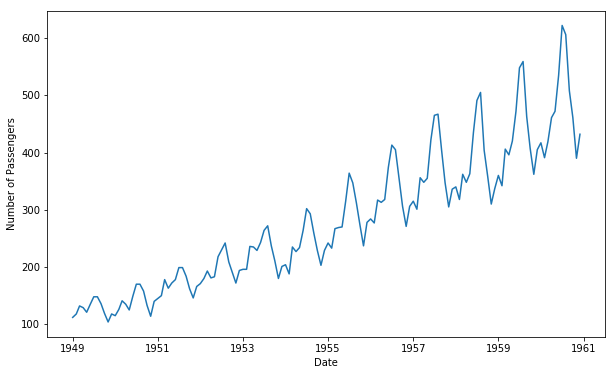

In [103]:
# Plot graph
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.plot(indexedData)

In [104]:
# Determining rolling statistics
rolmean= indexedData.rolling(window=12).mean()
rolstd=indexedData.rolling(window=12).std()
print(rolmean,rolstd)

            Passengers
TravelDate            
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01  126.666667
1950-01-01  126.916667
1950-02-01  127.583333
1950-03-01  128.333333
1950-04-01  128.833333
1950-05-01  129.166667
1950-06-01  130.333333
1950-07-01  132.166667
1950-08-01  134.000000
1950-09-01  135.833333
1950-10-01  137.000000
1950-11-01  137.833333
1950-12-01  139.666667
1951-01-01  142.166667
1951-02-01  144.166667
1951-03-01  147.250000
1951-04-01  149.583333
1951-05-01  153.500000
1951-06-01  155.916667
...                ...
1958-07-01  376.333333
1958-08-01  379.500000
1958-09-01  379.500000
1958-10-01  380.500000
1958-11-01  380.916667
1958-12-01  381.000000
1959-01-01  382.666667
1959-02-01  384.666667
1959-03-01  388.333333
1959-04-01  392.333333
1959-05-01 

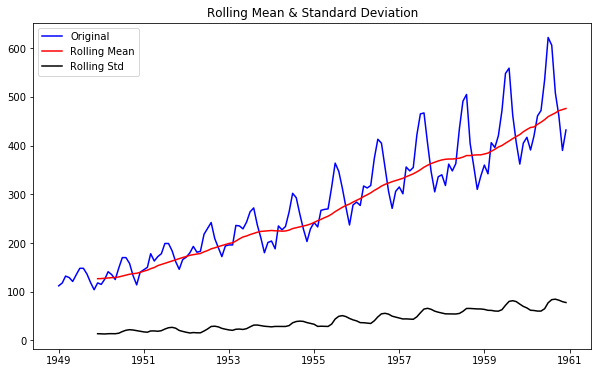

In [105]:
# Plot rolling Statistics:
orig= plt.plot(indexedData,color='blue',label='Original')
mean= plt.plot(rolmean,color='red',label='Rolling Mean')
std= plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [106]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest= adfuller(indexedData['Passengers'],autolag= 'AIC')

dfoutput= pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number Of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number Of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


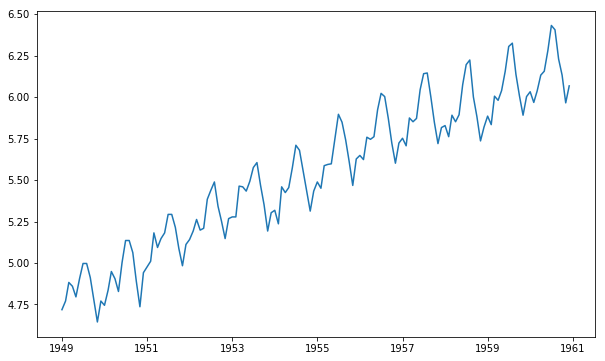

In [107]:
# Estimated trend
indexedData_logScale= np.log(indexedData)
plt.plot(indexedData_logScale)

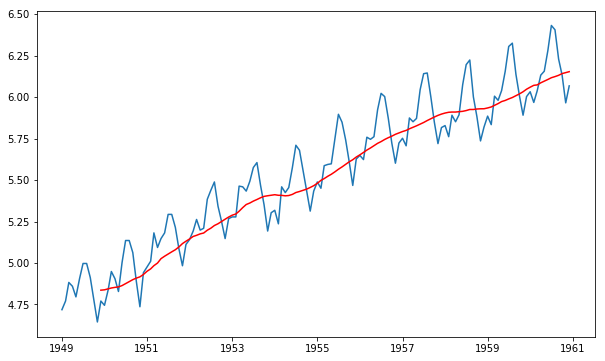

In [108]:
movingAverage= indexedData_logScale.rolling(window=12).mean()
movingstd= indexedData_logScale.rolling(window=12).std()
plt.plot(indexedData_logScale)
plt.plot(movingAverage,color='red')

In [109]:
indexedDatalogScaleminusmovingAverage= indexedData_logScale - movingAverage
indexedDatalogScaleminusmovingAverage.head(10)

,Passengers
TravelDate,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [110]:
# remove Nan Values
indexedDatalogScaleminusmovingAverage.dropna(inplace=True)
indexedDatalogScaleminusmovingAverage.head(10)

,Passengers
TravelDate,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [111]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    # determing Rolling statistics
    movingAverage= timeseries.rolling(window=12).mean()
    movingSTD= timeseries.rolling(window=12).std()
    
    # Plot rolling Statistics
    orig= plt.plot(timeseries,color='blue',label='Original')
    mean= plt.plot(movingAverage,color='red',label='Rolling Mean')
    std= plt.plot(movingSTD,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard deviation')
    plt.show(block=False)
    
    # Perform Dickey-fuller Test:
    print('Results of Dickey_fuller Test:')
    dftest= adfuller(timeseries['Passengers'],autolag= 'AIC')
    dfoutput= pd.Series(dftest[0:4],index=['Test Statistic','p-value','$Lags Used','Number of observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)
        
    

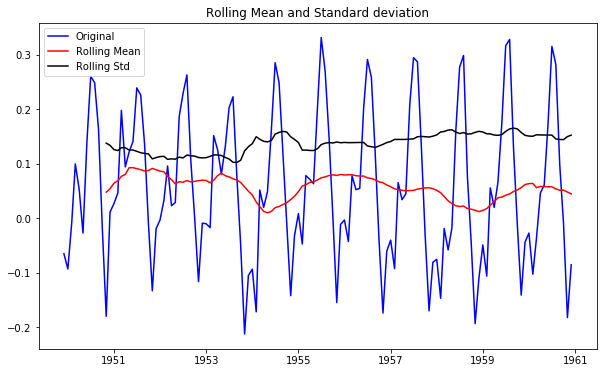

Results of Dickey_fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
$Lags Used                      13.000000
Number of observations used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [112]:
test_stationarity(indexedDatalogScaleminusmovingAverage)

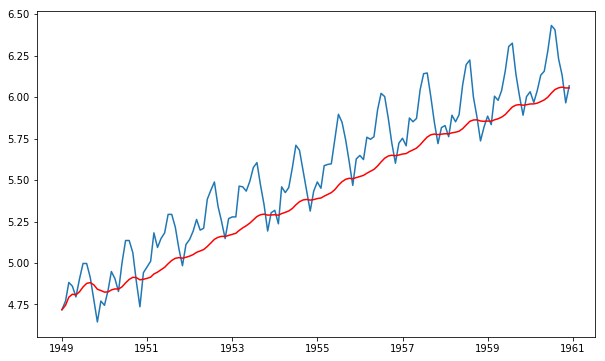

In [113]:
exponentialDecayWeightedAverage= indexedData_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedData_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')


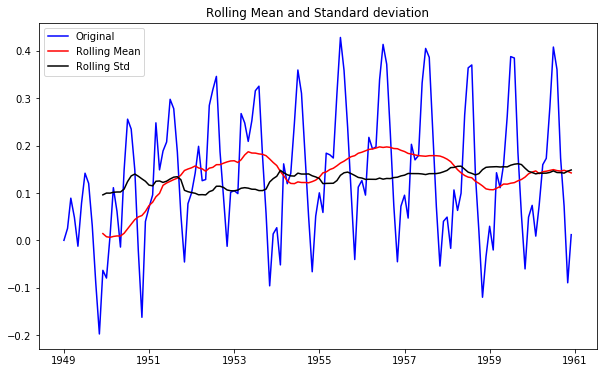

Results of Dickey_fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
$Lags Used                      13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [114]:
datasetLogScaleMinusMovingExponentialDecayAverage= indexedData_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

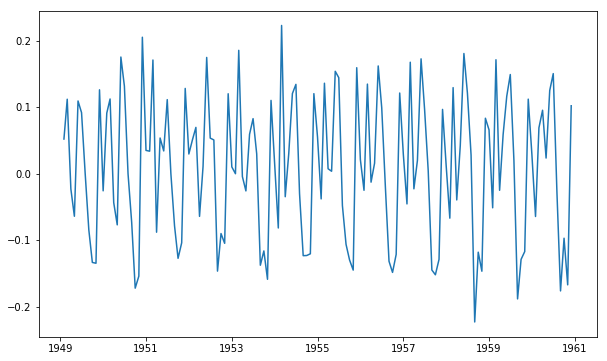

In [115]:
datasetLogDiffShiffting= indexedData_logScale - indexedData_logScale.shift()
plt.plot(datasetLogDiffShiffting)

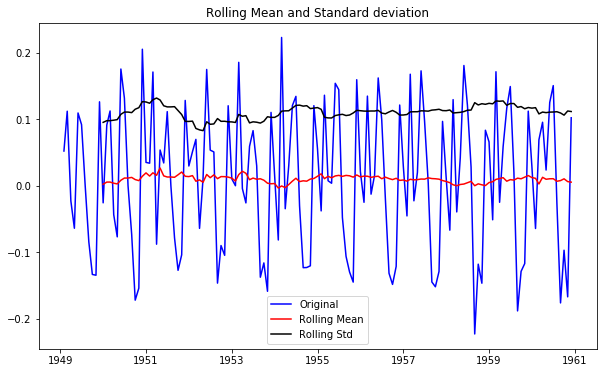

Results of Dickey_fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
$Lags Used                      14.000000
Number of observations used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [116]:
datasetLogDiffShiffting.dropna(inplace=True)
test_stationarity(datasetLogDiffShiffting)

In [120]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition= seasonal_decompose(indexedData_logScale)

trend= decomposition.trend
seasonal= decomposition.seasonal
residual= decomposition.resid

plt.subplot(nrows=4,ncols=1,index=1)
plt.plot(indexedData_logScale,label='Original')
plt.legend(loc= 'best')
plt.subplot([412])
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot([413])
plt.plot(seasonal,label= 'Seasonality')
plt.legend(loc='best')
plt.subplot([414])
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_llayout()

decomposedLogData= residual
decomposedLogData.dropna(inplace=True)
test_statioanrity(decomposedLogData)



C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


TypeError: 'int' object is not callable